<a href="https://colab.research.google.com/github/KhrTim/AI-application-systems/blob/main/Weekly_sessions/week6/week_6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Denoising using Neural Network

In [5]:
!pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110.5 MB 1.5 kB/s 
     |████████████████████████████████| 503 kB 71.4 MB/s 
     |████████████████████████████████| 50 kB 5.7 MB/s 
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
     |████████████████████████████████| 2.9 MB 47.0 MB/s 
     |████████████████████████████████| 3.8 MB 45.2 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=2d2c8e785e84b353679b1519cb563913322882e6743395c3c7397c637a861474
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninst

In [1]:
import os
import numpy as np
import zipfile
from urllib import request
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
import cv2

Using the fasion MNIST dataset

In [2]:
img_database = np.loadtxt('fashion-mnist_train.csv', delimiter=',', skiprows=1)[:,1:]

print(img_database.shape)

total_num_images = (img_database.shape[0])

(60000, 784)


In [3]:
n_input = 784 # Input image is of size 28 x 28 
hidden_layer_1 = 256
hidden_layer_2 = 32
hidden_layer_3 = 32
hidden_layer_4 = 256
output_layer = 784 # Same as the n_input dimension

# Parameters
learning_rate = 0.1
epochs = 100
batch_size = 100

# Define the placeholders
X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, output_layer])

Weight and Bias definitions of Neural Network

In [4]:
Weight_NN = {"W1" : tf.Variable(tf.random_normal([n_input, hidden_layer_1])),
             "W2" : tf.Variable(tf.random_normal([hidden_layer_1, hidden_layer_2])),
             "W3" : tf.Variable(tf.random_normal([hidden_layer_2, hidden_layer_3])),
             "W4" : tf.Variable(tf.random_normal([hidden_layer_3, hidden_layer_4])),
             "W5" : tf.Variable(tf.random_normal([hidden_layer_4, output_layer]))
}

Bias_NN = {"B1" : tf.Variable(tf.random_normal([hidden_layer_1])),
           "B2" : tf.Variable(tf.random_normal([hidden_layer_2])),
           "B3" : tf.Variable(tf.random_normal([hidden_layer_3])),
           "B4" : tf.Variable(tf.random_normal([hidden_layer_4])),
           "B5" : tf.Variable(tf.random_normal([output_layer]))
}

Connecting the Neural Network

In [5]:
Z1 = tf.add(tf.matmul(X, Weight_NN["W1"]), Bias_NN["B1"])
Z1_out = tf.nn.sigmoid(Z1)

Z2 = tf.add(tf.matmul(Z1_out, Weight_NN["W2"]), Bias_NN["B2"])
Z2_out = tf.nn.sigmoid(Z2)

Z3 = tf.add(tf.matmul(Z2_out, Weight_NN["W3"]), Bias_NN["B3"])
Z3_out = tf.nn.sigmoid(Z3)

Z4 = tf.add(tf.matmul(Z3_out, Weight_NN["W4"]), Bias_NN["B4"])
Z4_out = tf.nn.sigmoid(Z4)

Z5 = tf.add(tf.matmul(Z4_out, Weight_NN["W5"]), Bias_NN["B5"])
Z5_out = tf.nn.sigmoid(Z5)


In [6]:
Z1 = tf.layers.dense(X, hidden_layer_1, activation = tf.nn.sigmoid)
Z2 = tf.layers.dense(Z1, hidden_layer_2, activation = tf.nn.sigmoid)
Z3 = tf.layers.dense(Z1, hidden_layer_3, activation = tf.nn.sigmoid)
Z4 = tf.layers.dense(Z1, hidden_layer_4, activation = tf.nn.sigmoid)
NN_output = tf.layers.dense(Z4, output_layer)

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


Dataset preparation

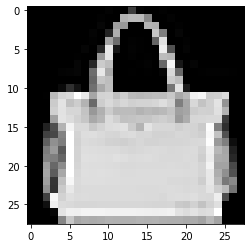

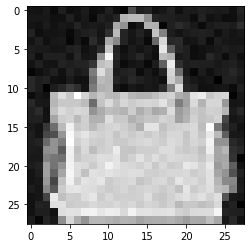

In [11]:

# Shiffle the dataset
np.random.shuffle(img_database)

X_train = img_database

# Normalzie the dataset
X_train = X_train

# Create a noisy dataset
X_train_noisy = X_train + 10*np.random.normal(0,1,size=X_train.shape)

# Original image
plt.imshow(X_train[0].reshape(28,28), cmap='gray')
plt.show()

# Noisy image
plt.imshow(X_train_noisy[0].reshape(28,28), cmap='gray')
plt.show()

In [12]:
# Define the metrics

# The loss funciton
computed_loss = tf.reduce_mean(tf.square(NN_output-Y))

# Define the optimizer
optimizer = tf.train.AdagradOptimizer(learning_rate).minimize(computed_loss)

# Initialize the variables
init = tf.global_variables_initializer()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 0 / 100 loss 4873.843
Epoch 1 / 100 loss 4693.058
Epoch 2 / 100 loss 4592.3545
Epoch 3 / 100 loss 4359.7354
Epoch 4 / 100 loss 4091.9883
Epoch 5 / 100 loss 3977.851
Epoch 6 / 100 loss 3859.5078
Epoch 7 / 100 loss 3809.827
Epoch 8 / 100 loss 3751.576
Epoch 9 / 100 loss 3718.3713
Epoch 10 / 100 loss 3703.1404
Epoch 11 / 100 loss 3653.3208
Epoch 12 / 100 loss 3552.0073
Epoch 13 / 100 loss 3581.054
Epoch 14 / 100 loss 3576.6033
Epoch 15 / 100 loss 3518.3262
Epoch 16 / 100 loss 3567.5068
Epoch 17 / 100 loss 3528.4077
Epoch 18 / 100 loss 3483.0085
Epoch 19 / 100 loss 3522.1787
Epoch 20 / 100 loss 3434.0068
Epoch 21 / 100 loss 3375.8875
Epoch 22 / 100 loss 3330.0017
Epoch 23 / 100 loss 3325.88
Epoch 24 / 100 loss 3278.7102
Epoch 25 / 100 loss 3318.2905
Epoch 26 / 100 loss 3222.4001
Epoch 27 / 100 loss 3221.3457
Epoch 28 / 100 loss 3228.5461
Epoch 29 / 100 loss 3307.7722
Epoch 30 / 100 loss 3237.8652
Epoch 31 / 100 loss 3212.3687
Epoch 32 / 100 loss 3147.7432
Epoch 33 / 100 loss 3156.898

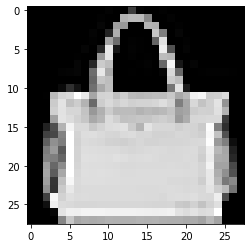

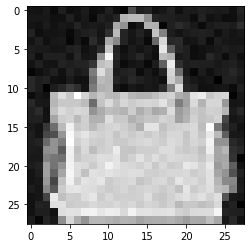

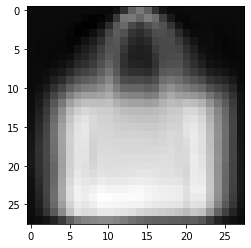

In [13]:
# Initialize the session

sess = tf.Session()
sess.run(init)

for epoch in range(epochs):
  for i in range(int(total_num_images/batch_size)):
    X_epoch = X_train[ i*batch_size : (i+1)*batch_size ]
    X_noise_epoch = X_train_noisy[ i*batch_size : (i+1)*batch_size ]
    _, loss = sess.run([optimizer, computed_loss], feed_dict = {X:X_noise_epoch, Y: X_epoch})
  print('Epoch', epoch, '/', epochs, 'loss', loss)

# Pick any image
X_actual = X_train[:10]
noisy_image = X_train_noisy[:10]

# Run it through the autoencoder
denoised_image = sess.run(NN_output, feed_dict = {X:noisy_image})

# Original image
plt.imshow(X_actual[0].reshape(28,28), cmap='gray')
plt.show()

# Noisy image
plt.imshow(noisy_image[0].reshape(28,28), cmap='gray')
plt.show()

# Noisy image
plt.imshow(denoised_image[0].reshape(28,28), cmap='gray')
plt.show()